# Python и машинное обучение

*Выполнил Сурков Георгий*

В данном файле находится анализ демографических данных. Функция для формирования обращения к человеку находится в файле `greeting.py`

In [1]:
# импортируем нужные библиотеки
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Загружаем данные

In [2]:
boys = pd.read_csv('./Boys.csv', sep=';', index_col='ID')
boys['Name'] = boys['Name'].apply(str.strip)

In [3]:
boys.head()

,Name,NumberOfPersons,global_id,Year,Month
ID,,,,,
1,Александр,253,37750243,2015,январь
2,Михаил,247,37750244,2015,январь
3,Иван,226,37750245,2015,январь
4,Максим,208,37750246,2015,январь
5,Артём,190,37750247,2015,январь


In [4]:
girls = pd.read_csv('./Girls.csv', sep=';', index_col='ID')
girls['Name'] = girls['Name'].apply(str.strip)

In [5]:
girls.head()

,Name,NumberOfPersons,global_id,Year,Month
ID,,,,,
1,Мария,252,37750254,2015,январь
2,Анастасия,224,37750255,2015,январь
3,Анна,190,37750256,2015,январь
4,Варвара,190,37750257,2015,январь
5,Виктория,186,37750258,2015,январь


In [6]:
girl_names_amount = girls.groupby(by='Name').aggregate({'NumberOfPersons': 'sum'})
girl_names_amount.reset_index(inplace=True)
girl_names_amount['NameLastChar'] = girl_names_amount['Name'].apply(lambda name: name.strip()[-1])
girl_names_amount.sort_values('NumberOfPersons', inplace=True, ascending=False)
girl_names_amount['IsMale'] = 0

In [7]:
boy_names_amount = boys.groupby(by='Name').aggregate({'NumberOfPersons': 'sum'})
boy_names_amount.reset_index(inplace=True)
boy_names_amount['NameLastChar'] = boy_names_amount['Name'].apply(lambda name: name.strip()[-1])
boy_names_amount.sort_values('NumberOfPersons', inplace=True, ascending=False)
boy_names_amount['IsMale'] = 1

In [8]:
children_names_amount = boy_names_amount.append(girl_names_amount).sort_values('NumberOfPersons', ascending=False)

In [9]:
children_last_char_amount = children_names_amount
children_last_char_amount['Males'] = children_last_char_amount.apply(lambda x: x['NumberOfPersons'] if x['IsMale'] == 1 else 0, axis=1)
children_last_char_amount['Females'] = children_last_char_amount.apply(lambda x: x['NumberOfPersons'] if x['IsMale'] == 0 else 0, axis=1)
children_last_char_amount = children_last_char_amount[['NameLastChar', 'Males', 'Females']].groupby('NameLastChar').agg('sum')

In [10]:
children_last_char_amount

,Males,Females
NameLastChar,,
а,11093,195800
б,3364,7
в,21693,0
г,1492,0
д,10398,0
е,0,55
и,1226,48
й,74828,0
к,8268,0


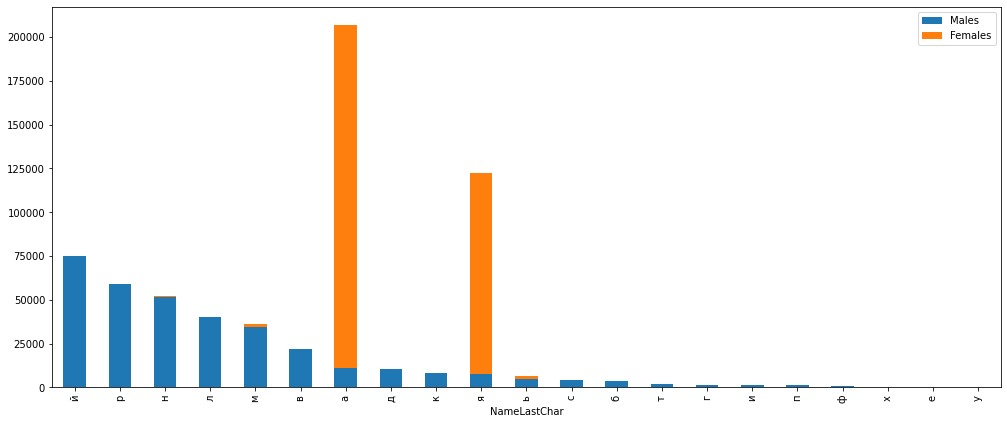

In [11]:
# plt.figure(figsize=(16, 7))
children_last_char_amount.sort_values('Males', ascending=False).plot.bar(stacked=True, figsize=(17, 7))
plt.show()

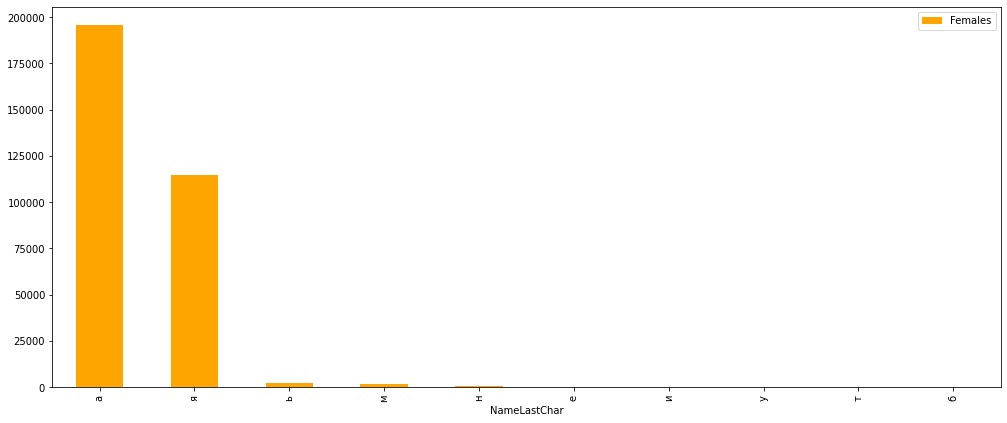

In [12]:
children_last_char_amount[children_last_char_amount['Females'] != 0].sort_values(
    'Females', ascending=False
).plot.bar(y='Females', color='orange', figsize=(17, 7))
plt.show()

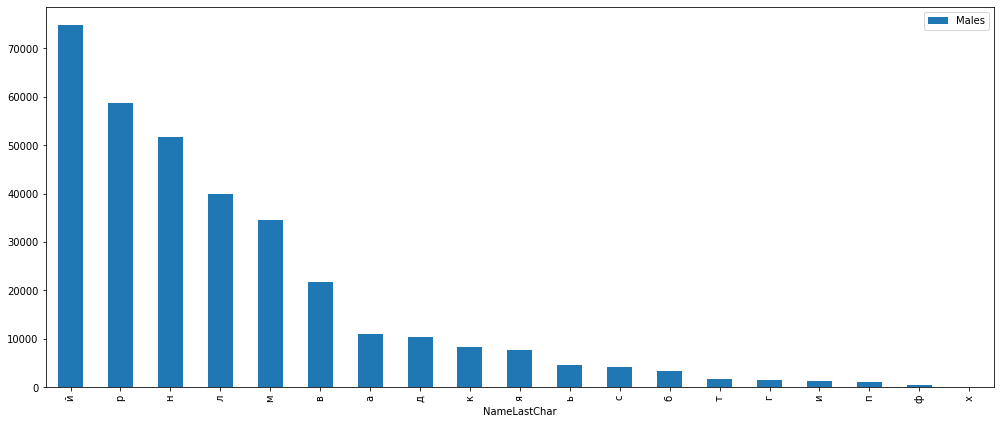

In [13]:
children_last_char_amount[children_last_char_amount['Males'] != 0].sort_values(
    'Males', ascending=False
).plot.bar(y='Males', figsize=(17, 7))
plt.show()

In [14]:
def count_intersections(series):
    res = series.value_counts()
#     print(res)
    if len(res) == 1:
        return 0
    return res.min()

Группируем данные по последним *n* буквам слова и смотрим, сколько есть маличиков и девочек с таким окончанием имени.  
Как видно, по 4 последним буквам имени можно однозначно определить пол.

In [19]:
for i in range(1, 5):
    print('-------------')
    print(f'ending_len == {i}')
    children_names_amount['NameLastChars'] = children_names_amount['Name'].apply(lambda name: name[-i:].lower())
    intersections = children_names_amount.groupby('NameLastChars').agg({'IsMale': count_intersections})
    print(intersections[intersections['IsMale'] != 0])

-------------
ending_len == 1
               IsMale
NameLastChars        
а                  10
б                   1
и                   1
м                   3
н                   3
т                   1
ь                   4
я                   2
-------------
ending_len == 2
               IsMale
NameLastChars        
ам                  1
ат                  1
ва                  1
за                  1
ин                  3
ка                  1
ла                  3
ли                  1
ль                  3
ма                  1
ня                  1
са                  1
та                  1
фа                  1
ья                  1
-------------
ending_len == 3
               IsMale
NameLastChars        
ель                 1
ила                 2
иса                 1
ита                 1
лла                 1
лья                 1
мин                 2
-------------
ending_len == 4
Empty DataFrame
Columns: [IsMale]
Index: []


In [20]:
# Получаем окончания имен у мальчиков и девочек
children_names_amount['NameLastChars'] = children_names_amount['Name'].apply(lambda name: name[-4:].lower())
male, female = children_names_amount.groupby('IsMale')
if male[0] == 0:
    male, female = female, male

In [21]:
import pickle

# Сохраняем окончания имен мальчиков и девочек в файл
with open('male_endings.pkl', 'wb') as f:
    male_endings = set(male[1]['NameLastChars'])
    pickle.dump(male_endings, f)
with open('female_endings.pkl', 'wb') as f:
    female_endings = set(female[1]['NameLastChars'])
    pickle.dump(female_endings, f)